In [27]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_ry_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [28]:
data

['t_n55          8.2856 ( 8.1566,  8.3325) ( 8.1890,  8.3402)  0.1511 (Jnode 106)\n',
 't_n56          8.2517 ( 8.1081,  8.3235) ( 8.1370,  8.3316)  0.1946 (Jnode 105)\n',
 't_n57          7.6669 ( 7.5120,  7.7874) ( 7.5295,  7.8000)  0.2705 (Jnode 104)\n',
 't_n58          6.6120 ( 6.4347,  6.7688) ( 6.4400,  6.7731)  0.3332 (Jnode 103)\n',
 't_n59          6.3784 ( 6.2008,  6.5388) ( 6.2061,  6.5424)  0.3363 (Jnode 102)\n',
 't_n60          6.1027 ( 5.9261,  6.2663) ( 5.9320,  6.2709)  0.3388 (Jnode 101)\n',
 't_n61          5.6973 ( 5.5233,  5.8628) ( 5.5239,  5.8634)  0.3394 (Jnode 100)\n',
 't_n62          2.8239 ( 2.5034,  3.1456) ( 2.5099,  3.1499)  0.6400 (Jnode 99)\n',
 't_n63          4.4844 ( 4.3227,  4.6517) ( 4.3187,  4.6467)  0.3280 (Jnode 98)\n',
 't_n64          3.6103 ( 3.4675,  3.7578) ( 3.4686,  3.7584)  0.2898 (Jnode 97)\n',
 't_n65          3.2903 ( 3.1588,  3.4280) ( 3.1604,  3.4292)  0.2688 (Jnode 96)\n',
 't_n66          2.7838 ( 2.6739,  2.9016) ( 2.6729,  2.90

In [29]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [30]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [31]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [32]:
posterior_mean_iqtree

[8.2856,
 8.2517,
 7.6669,
 6.612,
 6.3784,
 6.1027,
 5.6973,
 2.8239,
 4.4844,
 3.6103,
 3.2903,
 2.7838,
 2.1664,
 1.6577,
 0.6823,
 3.5465,
 6.151,
 5.5114,
 5.576,
 4.0756,
 3.5843,
 3.2873,
 6.017,
 5.664,
 5.4155,
 5.0958,
 4.6571,
 4.4688,
 3.8802,
 3.5189,
 3.194,
 2.4319,
 2.1586,
 3.9924,
 3.2003,
 5.8546,
 1.6892,
 5.6723,
 5.2613,
 4.676,
 4.2854,
 3.1702,
 3.5197,
 4.4925,
 4.2391,
 3.787,
 3.0675,
 3.8614,
 6.9226,
 5.3044,
 3.4162,
 2.7332,
 5.8245]

In [33]:
lower_ci_iqtree

[8.1566,
 8.1081,
 7.512,
 6.4347,
 6.2008,
 5.9261,
 5.5233,
 2.5034,
 4.3227,
 3.4675,
 3.1588,
 2.6739,
 2.093,
 1.6488,
 0.6003,
 3.3447,
 5.9698,
 5.2872,
 5.3841,
 3.8067,
 3.3088,
 2.9378,
 5.8318,
 5.4751,
 5.2216,
 4.9005,
 4.4629,
 4.2685,
 3.6809,
 3.3231,
 3.001,
 2.2532,
 1.9862,
 3.7805,
 2.9773,
 5.6655,
 1.3184,
 5.482,
 5.0718,
 4.4806,
 4.0872,
 2.9456,
 3.3074,
 4.2908,
 4.0343,
 3.5688,
 2.8315,
 3.583,
 6.7305,
 4.9801,
 3.0352,
 2.3089,
 5.3798]

In [34]:
upper_ci_iqtree

[8.3325,
 8.3235,
 7.7874,
 6.7688,
 6.5388,
 6.2663,
 5.8628,
 3.1456,
 4.6517,
 3.7578,
 3.428,
 2.9016,
 2.2467,
 1.6822,
 0.766,
 3.7454,
 6.3187,
 5.7231,
 5.7584,
 4.3345,
 3.8562,
 3.6275,
 6.1885,
 5.8449,
 5.6041,
 5.2852,
 4.849,
 4.6681,
 4.0814,
 3.7142,
 3.3887,
 2.6126,
 2.3363,
 4.2027,
 3.4204,
 6.0306,
 1.9101,
 5.8512,
 5.4441,
 4.8661,
 4.4802,
 3.3962,
 3.7284,
 4.6917,
 4.4421,
 4.0047,
 3.3029,
 4.1285,
 7.0967,
 5.6086,
 3.7999,
 3.1623,
 6.223]

In [35]:
file_LG = open("LG_ry_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

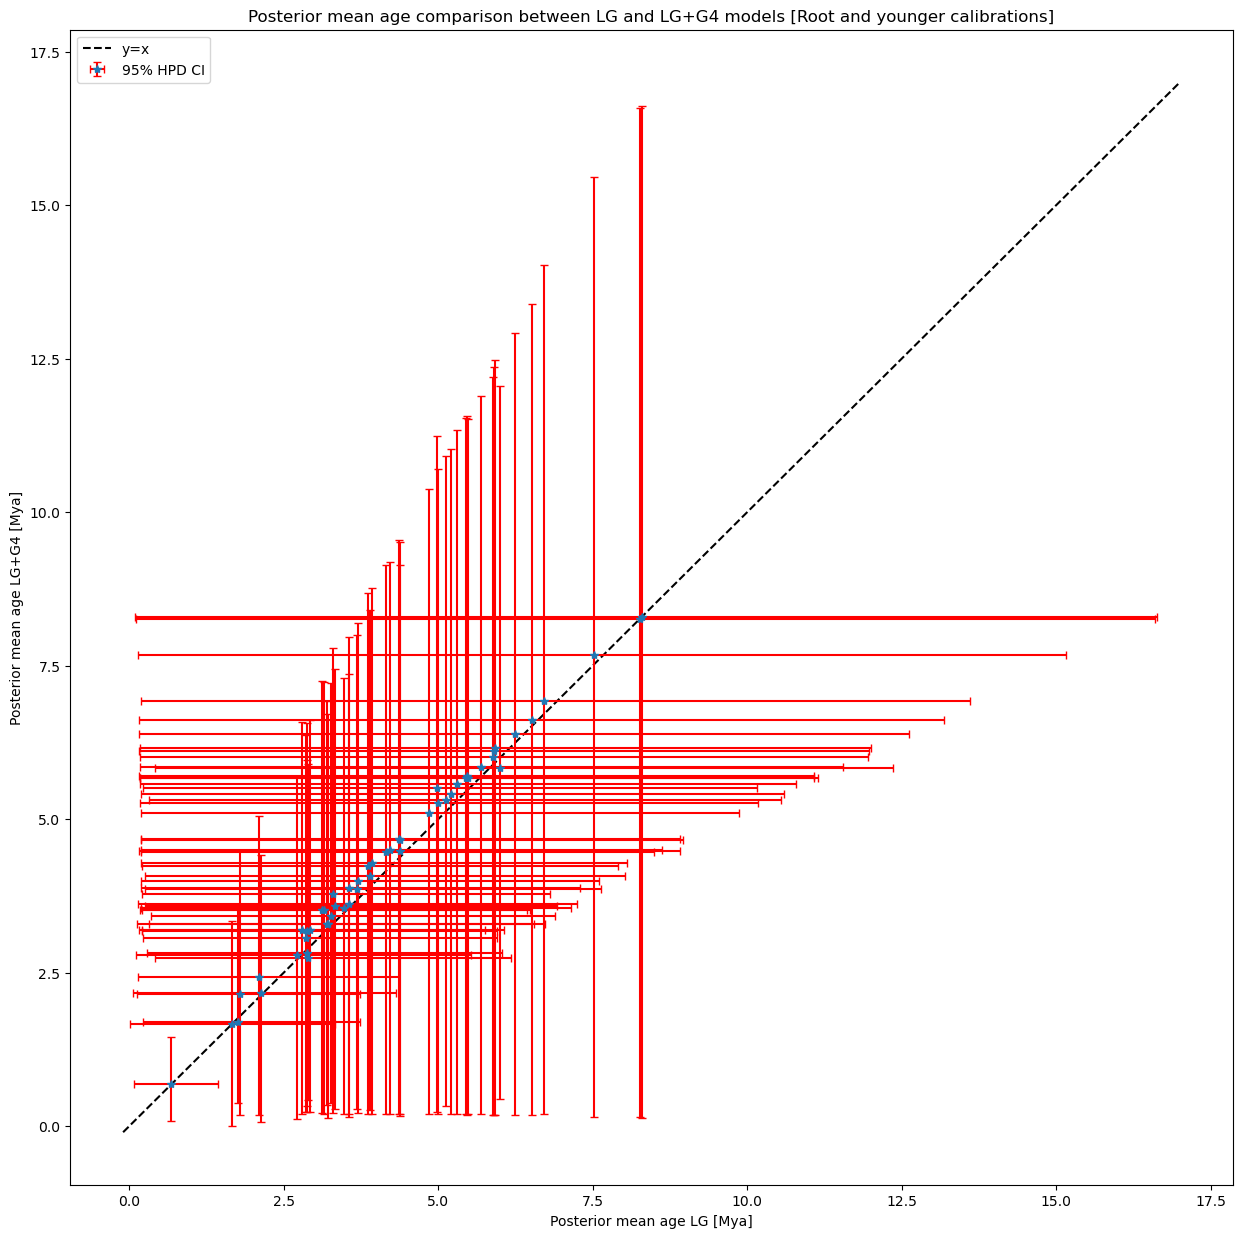

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Root and younger calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_ry.png')

In [37]:
posterior_mean_baseml

[8.2968,
 8.2701,
 7.5241,
 6.5162,
 6.2349,
 5.9091,
 5.4611,
 2.8722,
 4.3817,
 3.5549,
 3.2102,
 2.7078,
 2.1237,
 1.6556,
 0.6802,
 3.4785,
 5.9166,
 4.9765,
 5.3061,
 3.8897,
 3.3338,
 3.2023,
 5.8918,
 5.4807,
 5.2043,
 4.842,
 4.3838,
 4.1529,
 3.5526,
 3.1517,
 2.7918,
 2.1026,
 1.7954,
 3.7022,
 2.926,
 5.6894,
 1.7518,
 5.4508,
 4.999,
 4.3611,
 3.9325,
 2.8678,
 3.1145,
 4.2121,
 3.8545,
 3.3036,
 2.8633,
 3.6859,
 6.713,
 5.1274,
 3.2603,
 2.8837,
 5.9951]

In [38]:
posterior_mean_iqtree

[8.2856,
 8.2517,
 7.6669,
 6.612,
 6.3784,
 6.1027,
 5.6973,
 2.8239,
 4.4844,
 3.6103,
 3.2903,
 2.7838,
 2.1664,
 1.6577,
 0.6823,
 3.5465,
 6.151,
 5.5114,
 5.576,
 4.0756,
 3.5843,
 3.2873,
 6.017,
 5.664,
 5.4155,
 5.0958,
 4.6571,
 4.4688,
 3.8802,
 3.5189,
 3.194,
 2.4319,
 2.1586,
 3.9924,
 3.2003,
 5.8546,
 1.6892,
 5.6723,
 5.2613,
 4.676,
 4.2854,
 3.1702,
 3.5197,
 4.4925,
 4.2391,
 3.787,
 3.0675,
 3.8614,
 6.9226,
 5.3044,
 3.4162,
 2.7332,
 5.8245]

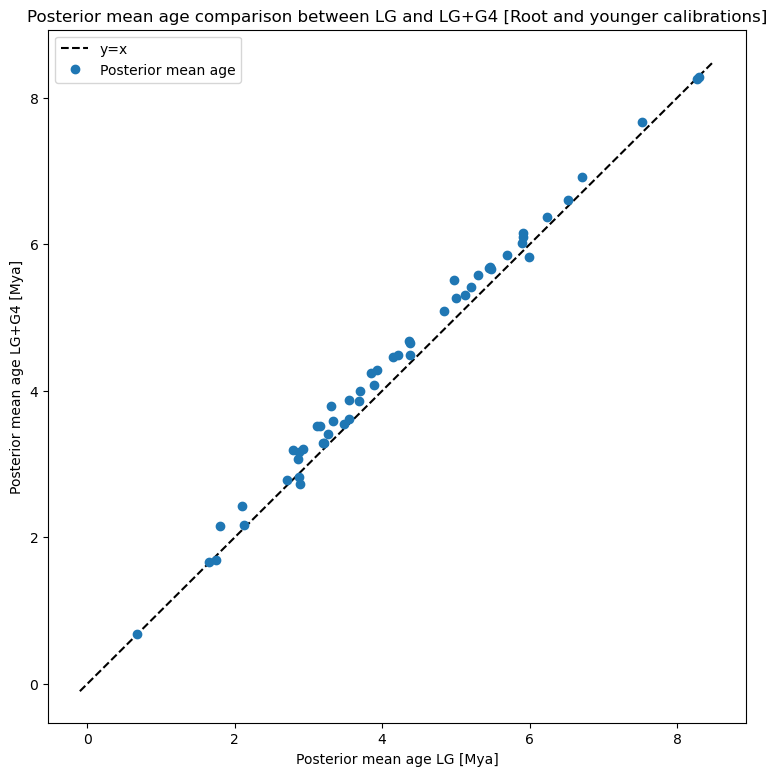

In [39]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,8.5], 
        [-0.1, 8.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Root and younger calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_ry_scatter.png')